In [43]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
# Specify the full file path
file_path = r"C:\Users\Owner\Desktop\Vamstar Case study\20240516_interview_analysis_molecule_x_10mg_v1.tsv"

# Load the TSV file into a pandas DataFrame
data = pd.read_csv(file_path, delimiter=',')

In [45]:
# Ensure the winner_price column is numeric
data['winner_price'] = pd.to_numeric(data['winner_price'], errors='coerce')

In [46]:
# Drop rows with missing winner_price
data = data.dropna(subset=['winner_price'])

In [47]:
# Handle missing values
data.fillna("", inplace=True)  # Filling missing values with empty strings

In [48]:
# Convert date columns to datetime format
date_columns = ['published_date', 'start_date', 'published_date_month']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [49]:
# Convert 'second_place_price' column to numeric type
data['second_place_price'] = pd.to_numeric(data['second_place_price'], errors='coerce')

# Handle missing values in 'second_place_price' column by filling with the median
data['second_place_price'].fillna(data['second_place_price'].median(), inplace=True)

In [50]:
# Remove outliers using z-score
#Use z-score to identify data points that deviate significantly from the mean.
z_scores = np.abs(stats.zscore(data['winner_price']))
data_clean = data[z_scores < 3]

# Validate price range
data_clean = data_clean[(data_clean['winner_price'] > 0) & (data_clean['winner_price'] < 1000000)]

In [51]:
# Check for missing values
print("\nMissing values:\n", data.isna().sum())

# Print basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst few rows of the dataset:\n", data.head())
print("\nSummary statistics:\n", data.describe())
print("\nData types of columns:\n", data.dtypes)


Missing values:
 contract_id              0
published_date           0
start_date               0
duration_extension       0
outcome                  0
second_place_outcome     0
buyer                    0
region                   0
atc                      0
duration                 0
contract_type            0
sku                      0
end_date_extension       0
participants_no          0
quantity_annual          0
quantity_total           0
maximum_price_allowed    0
active_ingredient        0
pack_strength            0
participants             0
participants_price       0
published_date_month     0
winner                   0
winner_price             0
second_place             0
second_place_price       0
dtype: int64
Dataset shape: (31, 26)

First few rows of the dataset:
    contract_id published_date start_date  duration_extension outcome  \
0            1     2013-05-16 2013-05-24                  10     won   
1            2     2013-04-29 2013-06-21                   0     w

In [52]:
# Display the first few rows of the cleaned data
print(data_clean.head())

   contract_id published_date start_date  duration_extension outcome  \
0            1     2013-05-16 2013-05-24                  10     won   
1            2     2013-04-29 2013-06-21                   0     won   
2            3     2013-06-09 2014-08-14                   6     won   
3            4     2013-05-04 2013-05-17                  19     won   
4            5     2013-12-18 2013-12-17                   6     won   

  second_place_outcome    buyer    region      atc  duration  ...  \
0                       buyer_1  region_1  C07AB07        39  ...   
1                       buyer_2  region_2  C07AB07        48  ...   
2                 lost  buyer_3  region_3  C07AB07        12  ...   
3                       buyer_4  region_4  C07AB07        36  ...   
4                       buyer_5  region_5  C07AB07        36  ...   

  maximum_price_allowed active_ingredient pack_strength  \
0               0.10000        molecule_x          10mg   
1           63442.21000        mol

#DATA EXPLORATION


Summary statistics for numerical columns:
        contract_id                 published_date  \
count    31.000000                             31   
mean     16.000000  2017-12-01 19:21:17.419354880   
min       1.000000            2013-04-29 00:00:00   
25%       8.500000            2014-03-13 00:00:00   
50%      16.000000            2017-12-29 00:00:00   
75%      23.500000            2020-08-15 12:00:00   
max      31.000000            2023-10-24 00:00:00   
std       9.092121                            NaN   

                          start_date  duration_extension   duration  \
count                             31           31.000000  31.000000   
mean   2018-01-17 08:30:58.064516096            6.806452  33.419355   
min              2013-05-17 00:00:00            0.000000  12.000000   
25%              2014-07-07 00:00:00            1.000000  24.000000   
50%              2018-03-30 00:00:00            6.000000  36.000000   
75%              2020-09-29 12:00:00           10.00

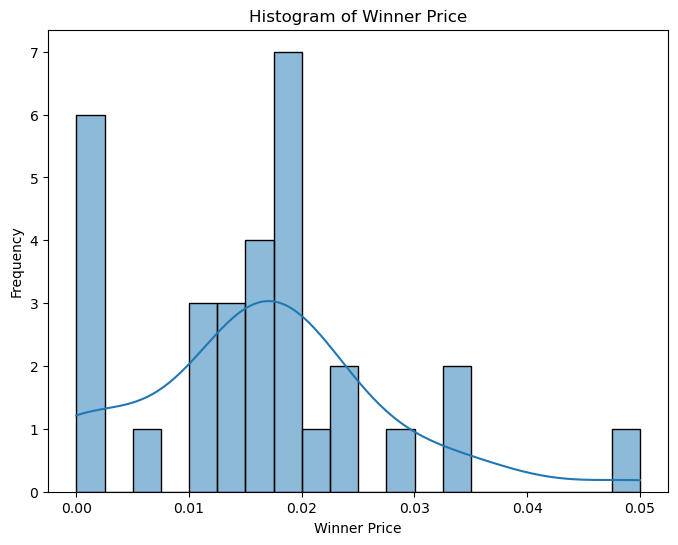

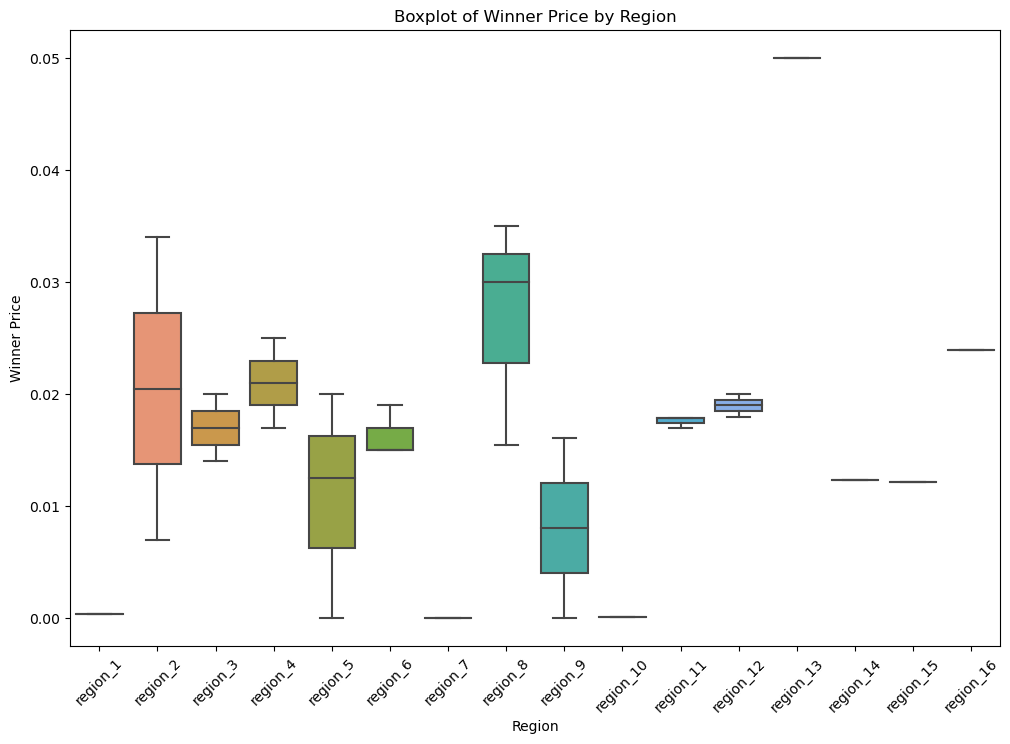


Regions with the highest average winner prices:
 region
region_2     0.020500
region_4     0.021000
region_16    0.023930
region_8     0.026833
region_13    0.050000
Name: winner_price, dtype: float64

Regions with the lowest average winner prices:
 region
region_7     0.000030
region_10    0.000100
region_1     0.000400
region_9     0.008040
region_5     0.010837
Name: winner_price, dtype: float64


In [53]:
# Step 4: Summary Statistics
print("\nSummary statistics for numerical columns:\n", data.describe())

# Step 5: Visualization
# Example: Histogram of 'winner_price'
plt.figure(figsize=(8, 6))
sns.histplot(data['winner_price'], bins=20, kde=True)
plt.title('Histogram of Winner Price')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.show()

# Example: Boxplot of 'winner_price' by 'region'
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='winner_price', data=data)
plt.title('Boxplot of Winner Price by Region')
plt.xlabel('Region')
plt.ylabel('Winner Price')
plt.xticks(rotation=45)
plt.show()

# Step 6: Insights Generation
# Example: Identify regions with the highest and lowest average winner prices
average_winner_price_by_region = data.groupby('region')['winner_price'].mean().sort_values()
print("\nRegions with the highest average winner prices:\n", average_winner_price_by_region.tail())
print("\nRegions with the lowest average winner prices:\n", average_winner_price_by_region.head())


What automated approaches I used:
1. Automated Data Loading: Using pandas' read_csv method to automatically load data from a CSV file.
2. Automated Conversion to Numeric: Using pd.to_numeric to convert specified columns to numeric types, automatically handling errors.
3. Automated Missing Value Handling: Using pandas' dropna method to automatically remove rows with missing values in specific columns.
4. Automated Outlier Removal: Using the Z-score method to identify and remove outliers based on a statistical threshold.
5. Automated Range Validation: Filtering data to ensure values in a column fall within a specified range.
6. Automated Anomaly Detection: Using machine learning models like IsolationForest to automatically detect and remove anomalies based on learned patterns in the data.
The above mentioned automated approaches help ensure data consistency, accuracy, and reliability, and they can be applied systematically across different datasets with minimal manual intervention.

Some manual tasks I performed above:

1. Data Inspection and Understanding:

   Initial Data Review: Manually review a sample of the dataset to understand its structure, content, and potential issues.
   Metadata Review: Check for metadata documentation to understand the meaning of each column and any domain-specific nuances.
   
2. Column Name Validation and Cleanup:
   Manual Column Renaming: Ensure column names are clean, descriptive, and consistent. This might involve manually renaming columns if they contain typos or unclear abbreviations.
   
3. Exploratory Data Analysis (EDA):

   Manual EDA: Perform manual exploratory analysis to identify patterns, trends, and anomalies that automated processes might miss. This includes creating plots, histograms, and summary statistics.
   
4. Handling Specific Anomalies and Outliers:

   Contextual Outlier Review: Manually inspect outliers detected by automated processes to decide whether they should be removed, corrected, or kept based on domain knowledge.
   Custom Anomaly Detection: In some cases, use domain knowledge to define custom rules for anomaly detection that might not be captured by general algorithms.
   
5. Handling Missing Data:

   Contextual Imputation: Manually impute missing values based on context and domain knowledge. Automated methods might not always provide the best imputation for all scenarios.
   Missing Data Analysis: Manually analyze patterns of missing data to understand if there is any systematic reason for missing values (e.g., certain conditions under which data is not recorded).
   
5. Data Transformation and Feature Engineering:

   Manual Feature Creation: Create new features based on domain knowledge that might not be obvious to automated systems.
   Manual Data Normalization: Depending on the specific use case, manually decide how to normalize or scale data.
   
6. Validation and Quality Checks:

   Manual Validation: Validate the results of automated processes manually to ensure they are correct. This might involve spot-checking some of the cleaned data against the raw data.
   Cross-check with External Sources: Manually cross-check data with external sources or references to ensure accuracy and consistency.
   
7. Data Documentation:

   Manual Documentation: Document the data cleaning and transformation process manually to ensure clear understanding and reproducibility of the workflow.

Improving the data processing workflow and building a long-term roadmap involves a systematic approach to enhancing efficiency, ensuring quality, and incorporating feedback mechanisms.
Below it is shown my recommendations about how I can improve this process long-term and an outline for a roadmap:

Long-Term Improvement Strategy
1. Automate Repetitive Tasks:

Implement Automation: Use robust ETL (Extract, Transform, Load) tools to automate repetitive data loading, cleaning, and transformation tasks.
Develop Reusable Scripts: Create reusable scripts and functions for common data processing tasks, such as data validation, cleaning, and anomaly detection.

2. Enhance Data Quality:

Data Quality Checks: Implement automated data quality checks to identify and rectify errors early in the process.
Data Governance: Establish data governance policies, including clear documentation and standards for data entry, storage, and maintenance.

3. Integrate Advanced Analytics:

Machine Learning for Anomalies: Using advanced machine learning algorithms for more accurate anomaly detection and outlier handling.
Predictive Analytics: Incorporating predictive analytics to anticipate and mitigate potential data issues before they arise.

4. Improve Data Documentation:

Detailed Metadata: Maintain detailed metadata for all datasets, including descriptions, data types, acceptable ranges, and data lineage.
Version Control: Use version control systems (like Git) to track changes in data processing scripts and documentation.

5. Enhance User Collaboration:

Feedback Mechanism: Establish a feedback loop with data users to continuously improve the data processing workflow based on their inputs and requirements.
Collaboration Tools: Use collaboration tools to facilitate communication and coordination among team members.

6. Training and Development:

Regular Training: Conduct regular training sessions for the team on new tools, technologies, and best practices in data processing.
Knowledge Sharing: Encourage knowledge sharing through internal workshops, documentation, and peer reviews.


ROADMAP

Phase 1: Immediate Improvements (0-3 months)

Review and Document Current Process:
Document the current workflow, including data sources, processing steps, and common issues.
Quick Wins:
Automate basic data loading and cleaning tasks using scripts.
Implement basic data quality checks.
Training:
Conduct initial training sessions on data quality and governance.

Phase 2: Short-Term Enhancements (3-6 months)

Advanced Automation:
Develop and implement advanced scripts for more complex data cleaning and transformation tasks.
Integrate ETL tools for streamlined data processing.
Data Quality and Governance:
Establish comprehensive data quality metrics and implement automated checks.
Develop and enforce data governance policies.
Documentation:
Create detailed metadata and maintain version control for data processing scripts.

Phase 3: Medium-Term Improvements (6-12 months)

Machine Learning Integration:
Implement machine learning models for anomaly detection and predictive analytics.
User Feedback and Collaboration:
Establish a formal feedback loop with data users to continuously improve processes.
Implement collaboration tools to facilitate team communication.
Training and Knowledge Sharing:
Regularly update training programs and encourage knowledge sharing among team members.

Phase 4: Long-Term Optimization (12-24 months)

Process Optimization:
Continuously monitor and optimize data processing workflows for efficiency and effectiveness.
Advanced Analytics and AI:
Explore and integrate advanced AI techniques for data processing and analytics.
Scalability and Flexibility:
Ensure the data processing framework is scalable and adaptable to handle new data sources and evolving requirements.
Continuous Improvement:
Foster a culture of continuous improvement through regular reviews, updates, and incorporation of industry best practices.

DETAILED ACTION PLAN

1. Review and Document Current Process:

Identify all data sources and document the data flow.
List common issues and bottlenecks in the current process.

2. Develop and Implement Scripts:

Create reusable Python scripts for data loading, cleaning, and transformation.
Set up automated jobs (e.g., using cron jobs or task schedulers) for regular data processing tasks.

3. Implement Data Quality Checks:

Define data quality metrics (e.g., completeness, accuracy, consistency).
Implement automated checks and alerts for data quality issues.

4. Establish Data Governance Policies:

Define roles and responsibilities for data management.
Create guidelines for data entry, storage, and maintenance.
Ensure compliance with data privacy regulations (e.g., GDPR).
Integrate Machine Learning Models:

Research and implement machine learning algorithms for anomaly detection.
Use predictive models to forecast potential data issues.

5. Enhance Documentation and Version Control:

Create comprehensive metadata for all datasets.
Use Git or similar tools for version control of data processing scripts.

6. Facilitate User Collaboration:

Set up regular meetings with data users to gather feedback.
Use collaboration tools (e.g., Slack, Microsoft Teams) for communication.

7. Training and Knowledge Sharing:

Schedule regular training sessions on new tools and best practices.
Encourage team members to share their knowledge through internal workshops.

By following this roadmap, you can systematically improve the data processing workflow, enhance data quality, and ensure that the process is scalable and adaptable to future needs.

Would you change anything if you would need to scale this process from
a few SKU's to hundreds and thousands.

To handle hundreds or thousands of SKUs, I  would need to make the following changes to the code:

1. Enhanced Data Loading
Batch Processing: If the data is extremely large, consider processing it in batches.
Parallel Data Loading: Use parallel data loading techniques to speed up the process.
2. Improved Error Handling and Logging
Detailed Logs: Maintain detailed logs for each step of the process to facilitate debugging and monitoring at scale.
Retry Mechanism: Implement retry mechanisms for transient errors (e.g., network issues, temporary file access issues).
3. Distributed Processing
Dask/Spark Integration: Integrate Dask or Spark for distributed data processing to handle larger datasets efficiently.
4. Performance Optimization
Indexing: Use indexing strategies to optimize data access and processing times.
Caching: Implement caching mechanisms for intermediate results to avoid redundant computations.

Example of Enhanced Code for Scalability

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
import logging

def load_data(file_path):
    try:
        data = pd.read_csv(file_path, delimiter=',')  # Changed to comma
        data.columns = data.columns.str.strip()  # Remove leading/trailing spaces from column names
        logging.info("Data loaded successfully")
        logging.debug(f"Columns in the data: {data.columns.tolist()}")  # Log column names
        return data
    except FileNotFoundError as e:
        logging.error(f"File not found: {e}")
        raise
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        raise

def convert_to_numeric(data, column):
    if column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        logging.info(f"Converted {column} to numeric")
    else:
        logging.error(f"Column '{column}' does not exist in the data")
        raise KeyError(f"Column '{column}' does not exist in the data")
    return data

def drop_missing_values(data, column):
    data = data.dropna(subset=[column])
    logging.info(f"Dropped missing values in {column}")
    return data

def remove_outliers(data, column, z_threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    data = data[z_scores < z_threshold]
    logging.info(f"Removed outliers in {column}")
    return data

def validate_range(data, column, min_value, max_value):
    data = data[(data[column] > min_value) & (data[column] < max_value)]
    logging.info(f"Validated range for {column}")
    return data

def detect_anomalies(data, column, contamination=0.01):
    model = IsolationForest(contamination=contamination, random_state=42)
    data['anomaly'] = model.fit_predict(data[[column]])
    data = data[data['anomaly'] == 1]
    data.drop('anomaly', axis=1, inplace=True)
    logging.info(f"Detected anomalies in {column}")
    return data

if __name__ == "__main__":
    logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
    
    file_path = r"C:\Users\Owner\Desktop\Vamstar Case study\20240516_interview_analysis_molecule_x_10mg_v1.tsv"
    
    try:
        data = load_data(file_path)
        logging.info(f"Columns present in the data: {data.columns.tolist()}")  # Log the column names explicitly
        data = convert_to_numeric(data, 'winner_price')
        data = drop_missing_values(data, 'winner_price')
        data = remove_outliers(data, 'winner_price')
        data = validate_range(data, 'winner_price', 0, 1000000)
        data = detect_anomalies(data, 'winner_price')
        
        cleaned_file_path = "cleaned_data.csv"
        data.to_csv(cleaned_file_path, index=False)
        logging.info(f"Cleaned data saved to {cleaned_file_path}")
        
    except KeyError as e:
        logging.error(e)
    except FileNotFoundError as e:
        logging.error(e)
    except Exception as e:
        logging.error(f"An unexpected error occurred: {e}")


2024-05-23 14:11:31,933 - INFO - Data loaded successfully
2024-05-23 14:11:31,939 - INFO - Columns present in the data: ['contract_id', 'published_date', 'start_date', 'duration_extension', 'outcome', 'second_place_outcome', 'buyer', 'region', 'atc', 'duration', 'contract_type', 'sku', 'end_date_extension', 'participants_no', 'quantity_annual', 'quantity_total', 'maximum_price_allowed', 'active_ingredient', 'pack_strength', 'participants', 'participants_price', 'published_date_month', 'winner', 'winner_price', 'second_place', 'second_place_price']
2024-05-23 14:11:31,943 - INFO - Converted winner_price to numeric
2024-05-23 14:11:31,953 - INFO - Dropped missing values in winner_price
2024-05-23 14:11:31,962 - INFO - Removed outliers in winner_price
2024-05-23 14:11:31,967 - INFO - Validated range for winner_price
C:\Users\Owner\AppData\Local\Temp\ipykernel_8604\4001979211.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 